# Statistics and Data Science 365/565
## Due September, 23 11:59pm Eastern

In [1]:
netid = "abc"
name = "xxx yyy"
print(netid)
print(name)

abc
xxx yyy


In [2]:
assert not netid == "xxx"

In [3]:
collaborators = ""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Fill in your solutions in the notebook `Assignment 2.ipynb` and submit the results to gradescope.

Make sure that all python cells run and do not have errors.

# Problem 0: median versus mean

Suppose that we want to estimate some unknown parameter $\mu^*$ where we only make observations of the form $x_i = \mu^* + w_i$ for some noise $w_i$. Suppose we have $n$ examples. Let's explore this problem across 1000 trials. We can generate the data as follows:

In [5]:
n = 100
TRIALS = 1000
mustar = 1
x = mustar + np.random.randn(n,TRIALS)

One possible estimate is the mean

In [6]:
muhat = np.mean(x,axis=0)

We can check out what the average error of muhat is over all the trials

In [7]:
np.mean(np.abs(muhat - mustar))

0.07556437280148946

However, what if we corrupt just **one** example in very bad way. For example

In [8]:
x[0]=10000

All we did is make the first example in every trial 10000.

In [9]:
muhat = np.mean(x,axis=0)

In [10]:
np.mean(np.abs(muhat - mustar))

99.9904820035592

The error is suddenly pretty bad. However, we can use another estimator. The median.

In [11]:
muhatmed = np.median(x,axis=0)

In [12]:
np.mean(np.abs(muhatmed - mustar))

0.09541266063426158

## Subproblem a)
Plot the error of the median as a function of how many observations are corrupted.

In [62]:
n = 100
TRIALS = 1000
mustar = 1
x = mustar + np.random.randn(n,TRIALS)

In [63]:
max_corrupt=49
num_corruptions = np.arange(0,max_corrupt+1)
muhatmedian_error = 0.*num_corruptions

In [64]:
for k in range(max_corrupt+1):
    if k>0:
        x[k-1]=1000. ##assignment broadcasting
    muhatmedian_error[k] = np.mean(np.abs(np.median(x,axis=0) - mustar))

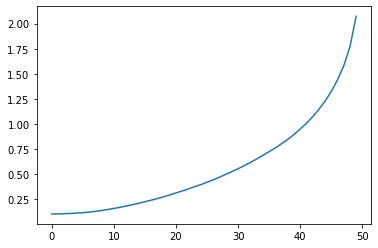

In [65]:
plt.plot(num_corruptions,muhatmedian_error)

## Subproblem b)

The median gracefully degrades in contrast to the mean. However, we notice that if the corruptions are 1/2 or more of the data, then the median also breaks down.

Note: generally you should visualize your data somehow (below we will play around with that) and remove such obvious errors. The dangerous errors are ones that are not so obvious.

# Problem 1: Implement k-nearest neighbors regression

Please read chapter 2 from Elements of Statistical Learning for more background.

The goal of k-nearest neighbors (KNN) regression with a loss $\ell$ is to find a function $\widehat{f}$ that minimizes
$$
\widehat{R}(f) = \frac{1}{n} \sum_{i=1}^n \ell(f(x_i),y_i)
$$

The function that KNN provides is the function $f_K$ such that on a new query point $x$ (note that of course $x$ could also be one of the training examples) KNN provides an estimate of the corresponding label $y$ for the example $x$ by solving an optimization over the $k$ closest neighbors to $x$. The $k$ nearest neighborhood set of $x$ is the set of $k$ points in the training set that are closest to $x$ with respect to some metric $d(x,x')$. The neighborhood set of $x$ is defined as
$$
N_k(x) = \{ i \in [n] \mid \textrm{ $d(x,x_i)$ is one of the $k$ smallest distances from $x$} \}
$$
We can then define $f_K(x)$ as
$$
f_K(x) = \arg \min_y \sum_{i \in N_k(x)} \ell(y,y_i)
$$

If $\ell(y,y_i) = (y-y_i)^2$ then we have already seen that the solution is
$$
f_K(x) = \frac{\sum_{i \in N_k(x)} y_i}{k}
$$
That is, for the choice of loss as squared error, then KNN outputs the average label across all $k$ closest neighbors to $x$.

If the loss is $|y - y_i|$, then you're exploring what the solution is in the math part.

## KNN for classification

Suppose that $y_i \in [k]$. That is $y_i \in \{0,1,2,...,k-1\}$, so one of $k$ different categories.
If the loss is the classification loss $\ell(y,y_i) = \mathbb{1}(y \neq y_i)$, then you can show that (you don't need to show this)
$$
f_K(x) = \textrm{mode}( \{y_i \mid i \in N_k(x) \} )
$$

Where for a set $S$ we define $\textrm{mode}(S)$ to be the most frequently occuring element. That is $f_K(x)$ is just the majority vote of the neighbors of $x$. For binary classification with $y_i \in \{0,1\}$ this takes an easy form
$$
f_K(x) = \mathbb{1} \left ( \left [ \frac{1}{k} \sum_{i \in N_k(x)} y_i \right ] > 0.5 \right )
$$
In the above we could also use $\geq$, but we generally take $k$ to be odd to avoid any ties.

## Choice of distance
We will take the choice of distance to be $d(x,x') = \|x - x'\|_2$

## Your implementation

You will now provide a simple implementation of KNN. Note that more sophisticated versions do a lot of pre-processing of the data to make the nearest neighbors search work very quickly. Advanced algorithms courses should cover that material. We won't.

In [66]:
def yourknn(x,X,y,k,DEBUG=False):
    """
    input
    x: set of m different d dimensional query points is np.ndarray of shape (m,d)
    X: training data is np.ndarray of shape (n,d)
    y: labels np.ndarry of shape (n,)
    k: integer, number of neighbors to consider 1<=k<=n
    Example:
    X[0] is example 0. y[0] is the label for example 0.
    x[0] is the first query point.
    
    output:
    yhat: predicted labels. np.ndarray of shape (m,)
    """
    m,d = x.shape
    n,d1 = X.shape
    assert(d==d1)
    ##in the following line of code you will construct
    ##the np.ndarray pairwisedistance of shape (m,n)
    ##such that pairwisedistance[i,j] = np.linalg.norm(x[i]-X[j])
    ##you must do this in one line using broadcasting
    pairwisedistance = np.linalg.norm(x[:,None,:]-X[None,:,:],axis=2) ##your code replaces this code
    ###You can use the following snippet of code to check your results
    ###The if(debug) part is just so that the code doesn't run when you don't need it to
    ###because it will slow down your code
    if (DEBUG):
        for i in range(m):
            for j in range(n):
                assert np.isclose(pairwisedistance[i,j],np.linalg.norm(x[i] - X[j]))
    ##next you will construct a neighbors array of shape (m,k)
    ##you must do this in one line using numpy.argsort
    neighbors = np.argsort(pairwisedistance,axis=1)[:,:k]
    ##in the following line you will build your prediction
    ##again one line can do this
    yhat = np.mean(y[neighbors],axis=1)
    return yhat

## Test your code

In [67]:
n=100
d=1
X = np.random.randn(n,d)
x = np.arange(-4,4,0.01)[:,None]
y = -X[:,0]**2+2 + np.random.randn(n)

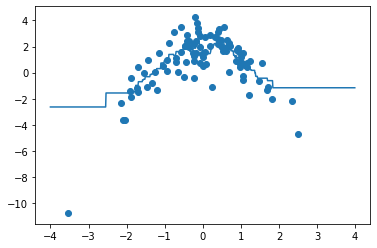

In [71]:
plt.plot(x[:,0],yourknn(x,X,y,10))
plt.scatter(X[:,0],y)

For $k=1$ your function should go through each of the test points.

A note about KNN is that we never really "trained" it. Rather, when we were given new data we find the closest representatives and predict the answer based on those closest representatives from the training set. That being said, if you were to use knn as a preliminary baseline in practice, you would run experiments on training/testing data to find the best choice of $k$.

# Problem 2: Linear regression and classification

Citi Bike is a public bicycle sharing system in New York City. There are hundreds of bike stations scattered throughout the city. Customers can check out a bike at any station and return it at any other station. Citi Bike caters to both commuters and tourists. Details on this program can be found at https://www.citibikenyc.com/

For this problem, you will build models to predict Citi Bike usage, in number of trips per day.
The dataset consists of Citi Bike usage information and weather data recorded from Central Park. 

Date files: `citibike_*.csv`, `weather.csv`

In the `citibike_*.csv` files, we see:

1. date

2. trips: the total number of Citi Bike trips. This is the outcome variable.

3. n_stations: the total number of Citi Bike stations in service

4. holiday: whether or not the day is a work holiday

5. month: taken from the date variable

6. dayofweek: taken from the date variable

In the `weather.csv` file, we have:

1. date

2. PRCP: amount precipitation (i.e. rainfall amount) in inches 

3. SNWD: snow depth in inches

4. SNOW: snowfall in inches

5. TMAX: maximum temperature for the day, in degrees F

6. TMIN: minimum temperature for the day, in degrees F

7. AWND: average windspeed

You are provided a training set consisting of data from 7/1/2013 to 3/31/2016, and a test set consisting of data after 4/1/2016. The weather file contains weather data for the entire year. 

## Part a: Read in and merge the data

To read in the data, you can run, for example:

In [72]:
train = pd.read_csv("citibike_train.csv")
test = pd.read_csv("citibike_test.csv")

In [73]:
weather = pd.read_csv("weather.csv")

Merge the training and test data with the weather data, by date. Once you have successfully merged the data, you may drop the "date" variable; we will not need it for the rest of this assignment.

In [75]:
merged_train = train.merge(weather,on='date')

In [76]:
merged_test = test.merge(weather,on='date')

Drop the date column here

In [77]:
merged_train_drop = merged_train.drop('date',axis=1)

In [78]:
merged_test_drop  = merged_test.drop('date',axis=1)

## Part b: Visualize data

As always, before you start any modeling, you should look at the data. Make plots of some of the numeric variables. Look for outliers and strange values. Look for missing data signified by NA. Comment on any steps you take to remove entries or otherwise process the data. Also comment on whether any predictors are strongly correlated with each other. Plot the max temperature against the min temperature. Is there a relationship? What's the correlation between each predictor (feature) against the length of trips?

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

I'll start you off with using describe. See anything strange?

In [80]:
merged_test.describe()

,trips,n_stations,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
count,183.000000,183.000000,183.000000,183.0,183.0,183.000000,183.000000,183.000000
mean,45204.240437,495.486339,0.107869,0.0,0.0,77.666667,61.803279,-432.785792
std,11389.449769,42.815584,0.246900,0.0,0.0,11.919756,11.419791,2050.954886
min,10697.000000,461.000000,0.000000,0.0,0.0,43.000000,26.000000,-9999.000000
25%,38004.000000,468.000000,0.000000,0.0,0.0,71.000000,54.000000,2.900000
50%,46075.000000,472.000000,0.000000,0.0,0.0,81.000000,65.000000,4.300000
75%,53369.000000,510.000000,0.070000,0.0,0.0,86.000000,71.000000,5.400000
max,67810.000000,597.000000,1.650000,0.0,0.0,96.000000,81.000000,12.800000


In [81]:
merged_train.describe()

,trips,n_stations,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,25021.621379,354.182817,0.119311,0.893207,0.113087,62.621379,48.121878,-24.608591
std,11517.483767,55.237302,0.345714,2.895540,0.755803,19.086527,18.025458,547.145313
min,876.000000,292.000000,0.000000,0.000000,0.000000,15.000000,-1.000000,-9999.000000
25%,15545.000000,324.000000,0.000000,0.000000,0.000000,46.000000,35.000000,3.800000
50%,26629.000000,327.000000,0.000000,0.000000,0.000000,64.000000,50.000000,4.900000
75%,34208.000000,331.000000,0.040000,0.000000,0.000000,80.000000,64.000000,6.700000
max,52706.000000,475.000000,4.970000,18.900000,11.000000,98.000000,83.000000,14.500000


### some observations

The AWND column seems to have some outliers. AWND is average wind speed, which shouldn't ever be negative, let alone -9999.

#### 1. Use the pandas isna function to see if any columns have NA values.

In [82]:
merged_train.isna().sum()

date          0
trips         0
n_stations    0
holiday       0
month         0
dayofweek     0
PRCP          0
SNWD          0
SNOW          0
TMAX          0
TMIN          0
AWND          0
dtype: int64

In [83]:
merged_test.isna().sum()

date          0
trips         0
n_stations    0
holiday       0
month         0
dayofweek     0
PRCP          0
SNWD          0
SNOW          0
TMAX          0
TMIN          0
AWND          0
dtype: int64

#### 2. Below plot histograms of the columns. Anything problematic?

Include your discussion of the plots, outliers, and other things you noticed here

I'll start you off. Here is the histogram of the 'trips' column.

(array([ 55., 103., 112., 108., 129., 167., 186.,  95.,  25.,  21.]),
 array([  876.,  6059., 11242., 16425., 21608., 26791., 31974., 37157.,
        42340., 47523., 52706.]),
 <a list of 10 Patch objects>)

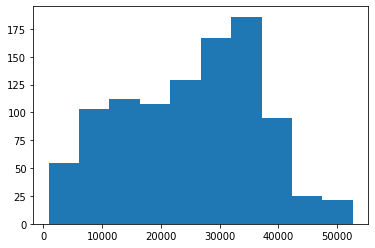

In [84]:
plt.hist(merged_train_drop['trips'])

Note that selecting a column in pandas works by bracket notation. (There are other ways)

Selecting rows can be done with Boolean selection. For instance we can look at all rows with `trips>50000'

In [85]:
train[train['trips']>50000].shape

(7, 6)

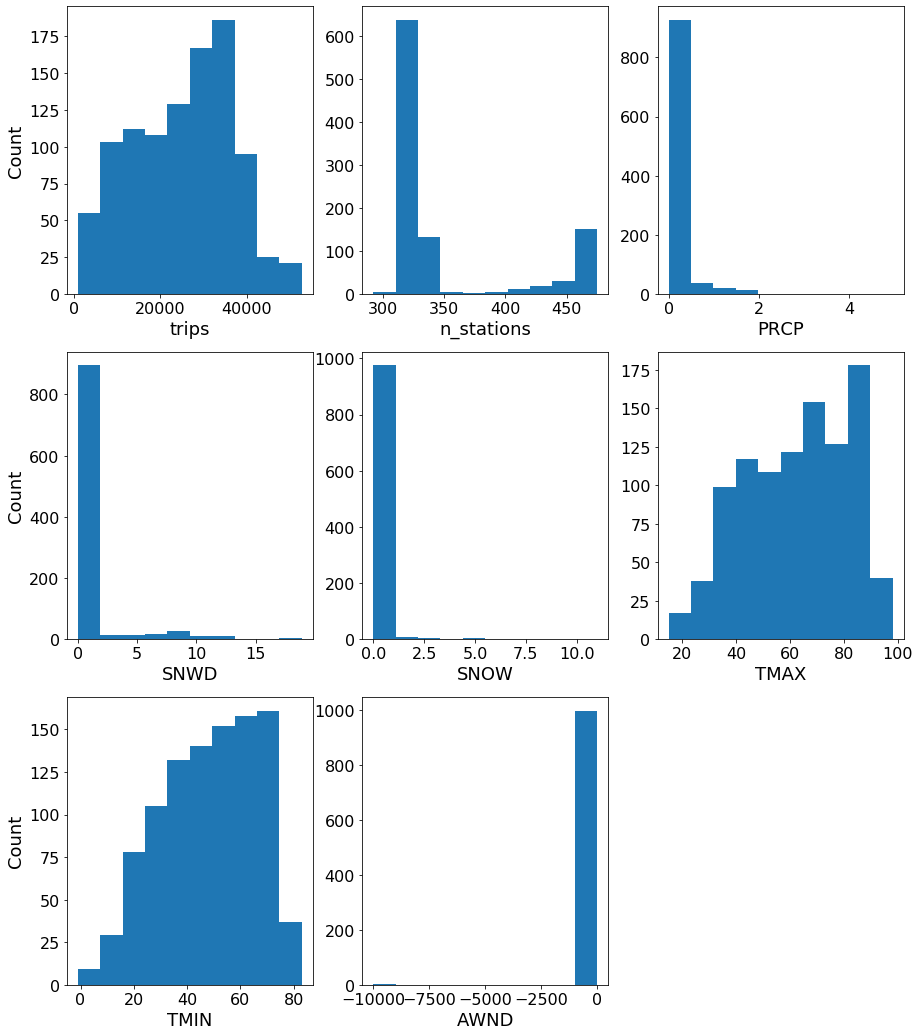

In [86]:
#Quantitative Variables
quantvars = ['trips', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']

fig, ax = plt.subplots(3,3, figsize=(15,18))

for i,var in zip(np.arange(len(quantvars)), quantvars):
    col = i%3
    row = int(i/3)
    ax[row,col].hist(merged_train_drop[var])
    ax[row,col].set_xlabel(var, fontsize=18)
    ax[row,col].tick_params('both',labelsize=16)
    if col==0:
        ax[row,col].set_ylabel("Count", fontsize=18)
        
ax[2,2].axis('off')
plt.show()

#### 3. Below remove any examples you think warrant removing. Explain your reasoning in this markdown cell.

In [87]:
## AWND has some outliers that can be removed
merged_train_drop.iloc[merged_train_drop.AWND.values < 0,:]

,trips,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
209,4980,322,False,Jan,Sun,0.00,3.9,0.0,34,17,-9999.0
880,15830,457,False,Nov,Sat,0.02,0.0,0.0,64,45,-9999.0
881,18452,456,False,Nov,Sun,0.00,0.0,0.0,49,38,-9999.0


In [89]:
merged_test_drop.iloc[merged_test_drop.AWND.values < 0,:]

,trips,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
34,32391,467,False,May,Fri,0.25,0.0,0.0,65,57,-9999.0
35,42063,464,False,May,Sat,0.00,0.0,0.0,73,56,-9999.0
36,28661,466,False,May,Sun,0.00,0.0,0.0,59,46,-9999.0
37,42787,468,False,May,Mon,0.00,0.0,0.0,66,43,-9999.0
39,44803,471,False,May,Wed,0.00,0.0,0.0,68,52,-9999.0
138,58154,536,False,Aug,Wed,0.00,0.0,0.0,88,68,-9999.0
139,53487,543,False,Aug,Thurs,0.01,0.0,0.0,86,69,-9999.0
140,52037,547,False,Aug,Fri,0.00,0.0,0.0,90,75,-9999.0


### Keep the rows that don't have such extreme outliers

In [90]:
merged_train_drop = merged_train_drop.iloc[merged_train_drop.AWND.values >= 0,:]
merged_test_drop = merged_test_drop.iloc[merged_test_drop.AWND.values >= 0,:]

Check histograms again

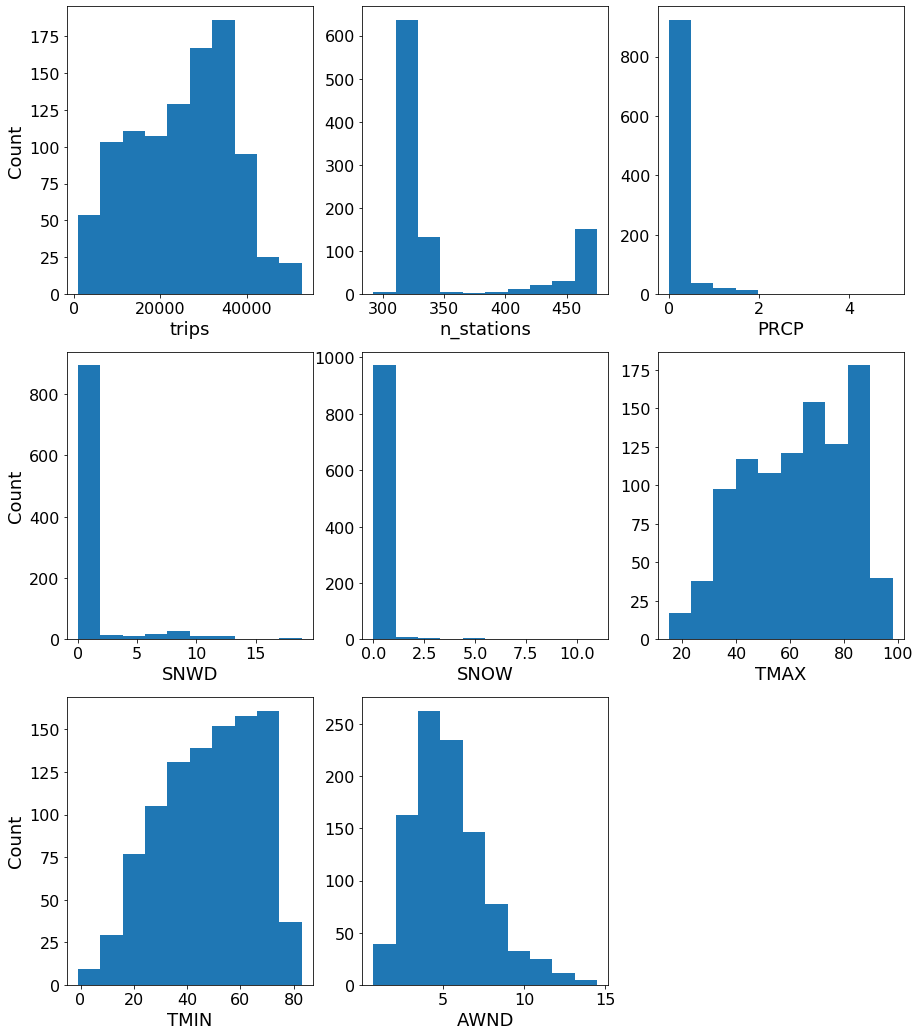

In [91]:
#Quantitative Variables
quantvars = ['trips', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']

fig, ax = plt.subplots(3,3, figsize=(15,18))

for i,var in zip(np.arange(len(quantvars)), quantvars):
    col = i%3
    row = int(i/3)
    ax[row,col].hist(merged_train_drop[var])
    ax[row,col].set_xlabel(var, fontsize=18)
    ax[row,col].tick_params('both',labelsize=16)
    if col==0:
        ax[row,col].set_ylabel("Count", fontsize=18)
        
ax[2,2].axis('off')
plt.show()

## Comment

For the rest of this problem, you will train your models on the training data and evaluate them on the test data.

## Part c: Linear regression

Fit a linear regression model to predict the number of trips. Include all the covariates (aka, predictors, features) in the data. Print the summary of your model using the statsmodels `summary` command. 

In [94]:
import statsmodels.formula.api as smf

In [95]:
formula = "trips ~ " + '+'.join(merged_train_drop.columns[1:]) + '+1'

## Note that smf automatically deal with the categorical variables (like month)

In [96]:
mod = smf.ols(formula=formula, data=merged_train_drop) ##This was from the class notebook. Fill in the correct info
##remember the string join command think about using "+".join(somelist) to create your formulas. You can also do it by hand.
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trips   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     277.6
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:08:03   Log-Likelihood:                -9701.8
No. Observations:                 998   AIC:                         1.946e+04
Df Residuals:                     972   BIC:                         1.958e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.259e+04   1476.054     -8.529      0.000   -1.55e+04   -9692.527
holiday[T.True]    -1.069e+04    792.633    -13.484      0.000   -1.22e+04   -9132.082
month[T.Aug]        4020.6356    796.919      5.045      0.000    2456.755    5584.516
month[T.Dec]       -3270.9909    749.933     -4.362      0.000   -4742.664   -1799.318
month[T.Feb]       -5578.7530    909.155     -6.136      0.000   -7362.887   -3794.619
month[T.Jan]       -5338.1330    827.200     -6.453      0.000   -6961.437   -3714.829
month[T.Jul]        2419.9228    825.049      2.933      0.003     800.841    4039.005
month[T.Jun]        4201.2430    823.687      5.101      0.000    2584.833    5817.653
month[T.Mar]       -3707.4829    749.673     -4.945      0.000   -5178.648   -2236.318
month[T.May]        3342.0011    779.435      4.288      0.000    1812.432    4871.571
month[T.Nov]        1643.8647    725.365      2.266      0.024     220.403    3067.326
month[T.Oct]        6235.1369    707.044      8.819      0.000    4847.629    7622.645
month[T.Sep]        6480.1390    751.764      8.620      0.000    5004.872    7955.406
dayofweek[T.Mon]    -711.1425    487.412     -1.459      0.145   -1667.644     245.359
dayofweek[T.Sat]   -5102.2038    487.483    -10.466      0.000   -6058.844   -4145.564
dayofweek[T.Sun]   -6262.1045    489.472    -12.794      0.000   -7222.648   -5301.561
dayofweek[T.Thurs]   623.6383    483.343      1.290      0.197    -324.878    1572.155
dayofweek[T.Tues]   -182.2952    486.709     -0.375      0.708   -1137.417     772.827
dayofweek[T.Wed]     818.1133    485.799      1.684      0.092    -135.223    1771.449
n_stations            69.6885      2.848     24.468      0.000      64.099      75.278
PRCP               -7937.5388    393.399    -20.177      0.000   -8709.549   -7165.529
SNWD                -246.0609     62.101     -3.962      0.000    -367.927    -124.194
SNOW                  76.3916    186.040      0.411      0.681    -288.694     441.477
TMAX                 328.9044     29.631     11.100      0.000     270.756     387.053
TMIN                 -72.3142     32.290     -2.240      0.025    -135.680      -8.948
AWND                -359.9903     68.306     -5.270      0.000    -494.035    -225.945
==============================================================================
Omnibus:                       43.902   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.516
Skew:                          -0.294   Prob(JB):                     2.69e-19
Kurtosis:                       4.308   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corr

Give the mean squared error (MSE) of the trained model on the training and test set.

In [97]:
tripspredict = res.predict(merged_test_drop)
tripstrainpredict = res.predict(merged_train_drop)

In [98]:
merged_test_drop.head()

,trips,n_stations,holiday,month,dayofweek,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,34449,476,False,Apr,Fri,0.02,0.0,0.0,79,61,6.7
1,23229,466,False,Apr,Sun,0.00,0.0,0.0,50,31,4.9
2,32048,473,False,Apr,Mon,0.01,0.0,0.0,65,43,6.9
3,23765,473,False,Apr,Tues,0.20,0.0,0.0,59,45,5.8
4,37539,472,False,Apr,Wed,0.00,0.0,0.0,58,40,4.5


In [102]:
##Test MSE
(np.mean((tripspredict - merged_test_drop['trips'])**2))

47832560.53273862

In [103]:
##Train MSE
np.mean((tripstrainpredict - merged_train_drop['trips'])**2)

16265864.151250264

The numbers are quite big so sometimes it is useful to look at the correlation instead

In [105]:
np.corrcoef(tripspredict,merged_test_drop['trips']) ##pretty good

array([[1.        , 0.86088221],
       [0.86088221, 1.        ]])

In [106]:
np.corrcoef(tripstrainpredict,merged_train_drop['trips']) ##pretty good

array([[1.        , 0.93655412],
       [0.93655412, 1.        ]])

### Can also look at Rsquared

In [108]:
1 - np.mean((tripspredict - merged_test_drop['trips'])**2)/np.mean((np.mean(merged_train_drop['trips']) - merged_train_drop['trips'])**2)

0.6386903403548663

In [109]:
1 - np.mean((tripstrainpredict - merged_train_drop['trips'])**2)/np.mean((np.mean(merged_train_drop['trips']) - merged_train_drop['trips'])**2)

0.8771336141141819

## Part d: KNN Classification

Now we will transform the outcome variable to allow us to do classification. Create a new vector $Y$ with entries:
$$
Y[i] = \mathbf{1} \{ \textrm{trips}[i] > \textrm{median}(\textrm{trips}) \}
$$

#### Part 1.
Use the median of the variable from the full data (training and test combined). After computing
the binary outcome variable $Y$, you should drop the original trips variable from the data.

In [114]:
np.median(pd.concat([merged_train_drop['trips'],merged_test_drop['trips']]))

28869.0

In [117]:
np.median(np.r_[merged_train_drop['trips'].values,merged_test_drop['trips']])

28869.0

In [154]:
fullmedian = np.median(pd.concat([merged_train_drop['trips'],merged_test_drop['trips']]))
ytrain = (merged_train_drop['trips'] > fullmedian)
ytest = (merged_test_drop['trips'] > fullmedian)

#### Part 2.

Drop the original trips column from the train and test set

Add the above constructed y vector to the respective train and test set

In [156]:
new_train_set = merged_train_drop.drop('trips',axis=1)
new_test_set = merged_test_drop.drop('trips',axis=1)
new_train_set["tripsind"] = ytrain
new_test_set["tripsind"] = ytest

#### Part 3.

Recall that in $k$-nearest neighbors classification, the predicted value $\hat Y$ of $X$ is 
the majority vote of the labels for the $k$ nearest neighbors $X_i$ to $X$. We will use the Euclidean distance as our measure of distance between points. Note that the Euclidean distance doesn't make much sense for factor variables, so just drop the predictors that are categorical for this problem.

In [157]:
newquantvars = ['tripsind', 'n_stations', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND']

In [158]:
new_train_set_drop = new_train_set[newquantvars]
new_test_set_drop = new_test_set[newquantvars]

#### Part 4.

Standardize the numeric predictors so that they have mean zero and constant standard deviation. Do this using the following steps.

Compute the mean and standard deviation of each column of `new_train_set` 

In [159]:
m = new_train_set_drop.mean()
s = new_train_set_drop.std()

Subtract the mean `m` from each column of the training and test set. For example, from every element of the column `new_train_set['AWND']` subtract `m['AWND']`. This operation can be done using broadcasting.

In [160]:
standard_train = new_train_set_drop - m
standard_test = new_test_set_drop - m

Divide each column of the training and test set with `s`. For example, divid every element in the column standard_train['AWND'] by s['AWND']. This operation can be done using broadcasting.

In [161]:
standard_train = standard_train/s #something here, one line of code
standard_test = standard_test/s #something here, one line of code

#### Question about standardization

When the variation between column is very different, we often standardize columns so that the statistics are similar. The above approach is one method. Another is to just ensure that the columns are all bounded between the same values. For linear regression this doesn't theoretically matter, but can help numerically. In nearest neighbors this matters a lot. Why?

If one variable is on the scale of billions while another is on the scaled of tens, then the one that is on the scale of billions probably contributes more to the error. Thus, our nearest neighbors will bias towards examples that are close in the billions scale feature and ignore the others. Standardizing helps put every feature on the same footing when computing the distanes.

#### Part 5 Training and testing
Use the sklearn neighbors library to perform $k$-nearest neighbor classification. Fit a classifier for $k = 1:50$, and find the mis-classification rate on both the training and test sets for each $k$. On a single plot, show the training set error and the test set error as a function of $k$. How would you choose the optimal $k$? Comment on your findings, and in particular on the possibility of overfitting.

In [163]:
?? neigh.fit

In [165]:
from sklearn.neighbors import KNeighborsClassifier as knn

X_train = standard_train.drop('tripsind', axis=1)
X_test = standard_test.drop('tripsind', axis=1)

train_rate = []
test_rate = []
ks = np.arange(1,51)
for k in ks:
    neigh = knn(n_neighbors=k)
    mdl = neigh.fit(X_train, ytrain)
    train_rate.append(len(np.where(mdl.predict(X_train) != ytrain)[0])/standard_train.shape[0])
    test_rate.append(len(np.where(mdl.predict(X_test) != ytest)[0])/standard_test.shape[0])

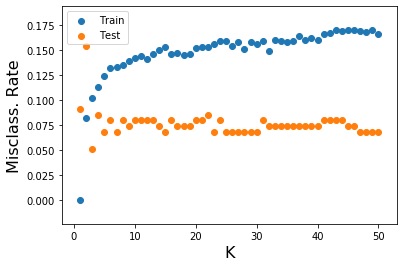

In [166]:
plt.scatter(ks, train_rate, label='Train')
plt.scatter(ks, test_rate, label='Test')

plt.ylabel("Misclass. Rate", fontsize=16)
plt.xlabel("K", fontsize=16)
plt.legend(loc='best')
plt.show()

#### Your discussion here: You'll notice something a bit strange about the test set versus the training set and the errors. What do you think that is?

In [174]:
merged_test['month'].value_counts()

May    31
Jul    31
Aug    31
Apr    30
Sep    30
Jun    30
Name: month, dtype: int64

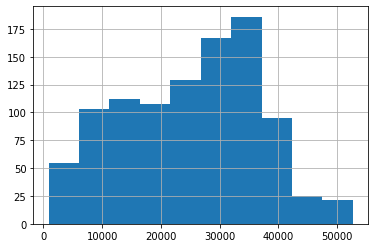

In [177]:
merged_train['trips'].hist()

In [178]:
fullmedian

28869.0

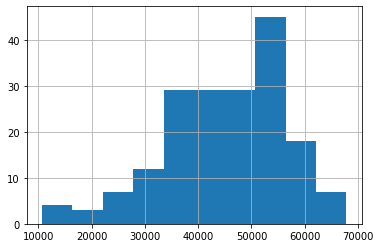

In [176]:
merged_test['trips'].hist()

Interestingly, the test error performs better than the training. This is likely due to the fact the test set is during easier months and the training set includes many more seasons. Namely, during most of the time in the test test the trips are greater than the full_median.

In [179]:
ytest.mean()

0.92

In [180]:
ytrain.mean()

0.4258517034068136